In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\admin\Desktop\dap\my_work\shopee_scrape\reviews_with_comment.csv')  
df.drop_duplicates(subset=['comment'], inplace=True)
df.reset_index(drop=True, inplace=True)
comments = df['comment'].tolist()
print(len(comments)) # in this case only 20% comments are unique
print(df['comment'])

77
0     Giao Hàng Nhanh. Đóng Gói Đẹp.Giao Đúng Màu, Đ...
1     U là trời. Ưng ý lắm luôn nha mọi người. Chất ...
2     Hàng của shop mình đã mua và sử dụng thấy rất ...
3     Giá rẻ, săn sale còn rẻ hơn mà nhìu đồ, chất l...
4     Shopee xưa giờ chuyên bán giá rẻ cho nên mình ...
                            ...                        
72       Đúng với mô tả:dép đúng vs hình\n\nSản phẩm ok
73    Thank ciuu bạn đã tin tưởng ủng hộ và để lại f...
74    rất đẹp, rẻ, sản phẩm hợp thời trang rất ưng v...
75    Đúng với mô tả:b5vỳtdtercvtvtc444c5vtbtv rrvrv...
76    Cỡ giày dép là một chỉ thị bằng số và chữ về đ...
Name: comment, Length: 77, dtype: object


In [3]:
from underthesea import text_normalize
# text_normalize(comments[73]) # ko chuyen dc tu viet tat
from underthesea import word_tokenize
word_tokenize(comments[73])

['Thank',
 'ciuu',
 'bạn',
 'đã',
 'tin tưởng',
 'ủng hộ',
 'và',
 'để',
 'lại',
 'feedback',
 'cho',
 'shop',
 'ạ',
 '🥰 Niềm',
 'tin',
 'b',
 'dành',
 'cho',
 'shop',
 'là',
 '1',
 'động lực',
 'lớn',
 'giúp',
 'shop',
 'cải thiện',
 'ngày một',
 'phát triển',
 'hơn',
 '.',
 'Shop chúc',
 'b',
 'cùng',
 'gđ',
 'luôn',
 'vui tươi',
 ',',
 'mạnh khỏe',
 ',',
 'hạnh phúc',
 'và',
 'gặp',
 'nhiều',
 'may mắn',
 'nhaaaaa',
 '❤',
 '️ ❤',
 '️']

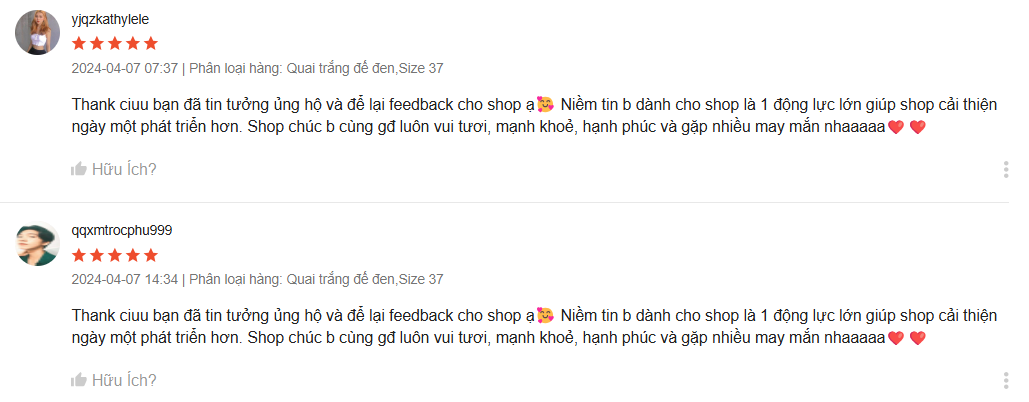

In [3]:
from IPython.display import Image

image_path = r'C:\Users\admin\Pictures\Screenshots\Screenshot 2024-05-28 223306.png'
Image(filename=image_path) # comment này là của KH, không phải của shop (get reviews chuẩn ko có sai)

In [6]:
from pyvi import ViTokenizer
ViTokenizer.tokenize(comments[73]) # ko tokenize đc từ viết tắt

'Thank ciuu bạn đã tin_tưởng ủng_hộ và để lại feedback cho shop ạ 🥰 Niềm tin b dành cho shop là 1 động_lực lớn giúp shop cải_thiện ngày_một phát_triển hơn . Shop chúc b cùng gđ luôn vui_tươi , mạnh_khoẻ , hạnh_phúc và gặp nhiều may_mắn nhaaaaa ❤ ️ ❤ ️'

In [17]:
comments[73]

'Thank ciuu bạn đã tin tưởng ủng hộ và để lại feedback cho shop ạ🥰 Niềm tin b dành cho shop là 1 động lực lớn giúp shop cải thiện ngày một phát triển hơn. Shop chúc b cùng gđ luôn vui tươi, mạnh khoẻ, hạnh phúc và gặp nhiều may mắn nhaaaaa❤️❤️'

In [ ]:
# 15 RPM (requests per minute)
# 1 million TPM (tokens per minute)
# 1,500 RPD (requests per day)

import google.generativeai as genai

API_KEY = ''
genai.configure(api_key=API_KEY)

comment = comments[73]
promt = f"""
Tóm tắt khai thác các bình luận sau: {comment}.
Output dạng HTML, bao gồm: 
<h3>Ưu điểm</h3>
<h3>Nhược điểm</h3>

"""

model = genai.GenerativeModel('gemini-1.5-flash')

response = model.generate_content(promt)
response.text

"**Example:**\n\nConsider a point in 2D space with Cartesian coordinates (x, y).\n\n**Homogeneous Coordinates:**\n\nWe can represent the same point in homogeneous coordinates as a 3-vector (x', y', h):\n\n```\n(x', y', h) = (hx, hy, h)\n```\n\nwhere h is a non-zero parameter that acts as a scale factor.\n\n**Example values:**\n\nLet's choose h = 1 for simplicity:\n\n```\n(x', y', 1) = (x, y, 1)\n```\n\n**Projective Transformations:**\n\nHomogeneous coordinates are particularly useful in projective geometry, where transformations preserve certain geometric properties.\n\nFor example, the following 2x3 transformation matrix (known as a projective transformation matrix) can be used to translate the point (x, y) by (dx, dy):\n\n```\n[ 1  0  dx ]\n[ 0  1  dy ]\n[ 0  0  1  ]\n```\n\nWhen applied to the homogeneous coordinates of the point:\n\n```\n| x' |   | 1  0  dx |   | x |\n| y' | = | 0  1  dy | * | y |\n| h  |   | 0  0  1  |   | h |\n```\n\nThis results in the transformed homogeneous co

In [3]:
print(response.text)

**Example:**

Consider a point in 2D space with Cartesian coordinates (x, y).

**Homogeneous Coordinates:**

We can represent the same point in homogeneous coordinates as a 3-vector (x', y', h):

```
(x', y', h) = (hx, hy, h)
```

where h is a non-zero parameter that acts as a scale factor.

**Example values:**

Let's choose h = 1 for simplicity:

```
(x', y', 1) = (x, y, 1)
```

**Projective Transformations:**

Homogeneous coordinates are particularly useful in projective geometry, where transformations preserve certain geometric properties.

For example, the following 2x3 transformation matrix (known as a projective transformation matrix) can be used to translate the point (x, y) by (dx, dy):

```
[ 1  0  dx ]
[ 0  1  dy ]
[ 0  0  1  ]
```

When applied to the homogeneous coordinates of the point:

```
| x' |   | 1  0  dx |   | x |
| y' | = | 0  1  dy | * | y |
| h  |   | 0  0  1  |   | h |
```

This results in the transformed homogeneous coordinates:

```
(x' + dx, y' + dy, h)
```



In [5]:
word_tokenize(response.text)

['Cảm ơn',
 'bạn',
 'đã',
 'tin tưởng',
 'ủng hộ',
 'và',
 'để',
 'lại',
 'phản hồi',
 'cho',
 'shop',
 'ạ',
 '🥰',
 'Niềm',
 'tin',
 'của',
 'bạn',
 'dành',
 'cho',
 'shop',
 'là',
 'một',
 'động lực',
 'lớn',
 'giúp',
 'shop',
 'cải thiện',
 'ngày một',
 'phát triển',
 'hơn',
 '.',
 'Shop',
 'chúc',
 'bạn',
 'cùng',
 'gia đình',
 'luôn',
 'vui tươi',
 ',',
 'mạnh khỏe',
 ',',
 'hạnh phúc',
 'và',
 'gặp',
 'nhiều',
 'may mắn',
 'nhaaaaa',
 '❤',
 '️ ❤',
 '️']

In [ ]:
import openai

openai_key = ""
client = openai.OpenAI(api_key=openai_key)

# from tenacity import (
#     retry,
#     stop_after_attempt,
#     wait_random_exponential,
# )  # for exponential backoff

# @retry(wait=wait_random_exponential(min=1, max=60), stop=stop_after_attempt(6))
# def completion_with_backoff(**kwargs):
#     return client.chat.completions.create(**kwargs)

message = f"normalize: {comment}"
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
              {"role": "user", "content": message}]
)
response